<a href="https://colab.research.google.com/github/sahil8370/Loan_predcition/blob/main/loan_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

[To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.] 

**problem link:**
https://www.analyticsvidhya.com/blog/2022/02/loan-approval-prediction-machine-learning/)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
#visualisation library
import matplotlib.pyplot as plt
%matplotlib inline
#loading data
data=pd.read_csv('/content/loan_data_set.csv')

In [2]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#data preprocessing
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#filling null values ,values with max value_count 

In [6]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data.Gender=data.Gender.fillna(1)

In [8]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
data.Married=data.Married.fillna('Yes')

In [10]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data.Dependents=data.Dependents.fillna(0)

In [12]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(360.0)

In [14]:

data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
data.Credit_History=data.Credit_History.fillna(1.)

In [16]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
data.LoanAmount=data.LoanAmount.fillna(120.0)

In [18]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
data.Self_Employed=data.Self_Employed.fillna('No')

In [21]:
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Dependents':{'3+':3}},inplace=True)

In [22]:
#split the data in input and output
x=data.iloc[1:614,1:12].values
y=data.iloc[1:614,12]

In [23]:
x

array([[1, 1, '1', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       [1, 1, '0', ..., 360.0, 1.0, 2],
       ...,
       [1, 1, '1', ..., 360.0, 1.0, 2],
       [1, 1, '2', ..., 360.0, 1.0, 2],
       [0, 0, '0', ..., 360.0, 0.0, 1]], dtype=object)

In [24]:
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 613, dtype: object

In [25]:
#train and test split
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [27]:
x_train

array([[1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 180.0, 1.0, 0],
       ...,
       [0, 0, '1', ..., 360.0, 1.0, 1],
       [1, 0, '0', ..., 360.0, 1.0, 1],
       [1, 1, '2', ..., 360.0, 1.0, 1]], dtype=object)

In [28]:
#from sklearn.preprocessing import LabelEncoder

In [29]:
#labelencoder=LabelEncoder()

In [30]:
#for i in range(0,5):
 # x_train[:,i]=labelencoder.fit_transform(x_train[:,i])
#x_train[:,10]=labelencoder.fit_transform(x_train[:,10]) 

In [31]:
#labelencoder_y=LabelEncoder()

In [32]:
#y_train=labelencoder_y.fit_transform(y_train)

In [33]:
#labelencoder_xt=LabelEncoder()

In [34]:
#x_test[:,i]=labelencoder.fit_transform(x_test[:,i])
#x_test[:,10]=labelencoder.fit_transform( x_test[:,10])

In [35]:
#y_test=labelencoder.fit_transform(y_test)

In [36]:
#y_test
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


In [37]:
#label encoder is not working fine so converting string to float manually
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [38]:
#scaling
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
x_train=sc.fit_transform(x_train)

In [41]:
x_train

array([[ 0.48245064,  0.71826253,  2.20927819, ...,  0.28842741,
         0.42257713, -0.04163644],
       [ 0.48245064,  0.71826253,  2.20927819, ...,  0.28842741,
         0.42257713, -1.31749579],
       [ 0.48245064,  0.71826253, -0.7402457 , ..., -2.58468461,
         0.42257713, -1.31749579],
       ...,
       [-2.0727509 , -1.3922486 ,  0.24292893, ...,  0.28842741,
         0.42257713, -0.04163644],
       [ 0.48245064, -1.3922486 , -0.7402457 , ...,  0.28842741,
         0.42257713, -0.04163644],
       [ 0.48245064,  0.71826253,  1.22610356, ...,  0.28842741,
         0.42257713, -0.04163644]])

In [42]:
x_test=sc.fit_transform(x_test)

In [43]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [44]:
x_train=pca.fit_transform(x_train)

In [45]:
x_test=pca.fit_transform(x_test)

In [46]:
x_train

array([[ 2.43962865, -0.26929076,  1.70945804],
       [ 0.96408823, -1.06283497, -0.0128532 ],
       [ 0.51645776, -1.05305119,  0.32504524],
       ...,
       [-1.84984542,  0.99902834, -0.09992003],
       [-1.45339765,  0.45965386,  0.09349522],
       [ 0.31354739, -1.82286699, -0.82132838]])

In [47]:
#classificatioon
#logistic regression
#nearest neighnour
#SVM


In [48]:
#logistic regresssion
from sklearn.linear_model import LogisticRegression

In [49]:
lrclf=LogisticRegression(max_iter=100,random_state=0)

In [50]:
#training model
lrclf.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [51]:
x_train

array([[ 2.43962865, -0.26929076,  1.70945804],
       [ 0.96408823, -1.06283497, -0.0128532 ],
       [ 0.51645776, -1.05305119,  0.32504524],
       ...,
       [-1.84984542,  0.99902834, -0.09992003],
       [-1.45339765,  0.45965386,  0.09349522],
       [ 0.31354739, -1.82286699, -0.82132838]])

In [52]:
y_test.values

array(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

In [53]:
lrclf.predict(x_test)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

In [54]:
#predicting values
y_pred=lrclf.predict(x_test)

In [55]:
y_test.values

array(['Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

In [56]:
#checking accuracy
from sklearn import metrics

In [57]:
metrics.accuracy_score(y_test,y_pred)

0.75

In [58]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [59]:
cm

array([[ 16,  40],
       [  6, 122]])

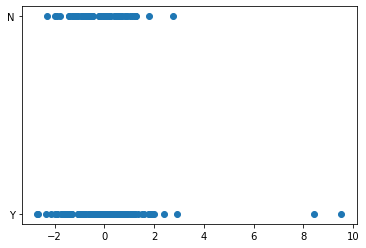

In [60]:
#observed data
plt.scatter(x_test[:,0],y_test)

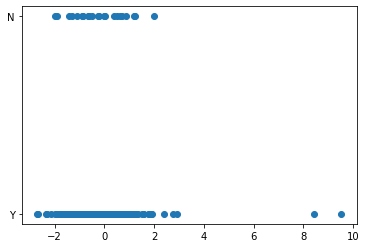

In [61]:
#predicted data
plt.scatter(x_test[:,0],y_pred)

In [62]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knnclf=KNeighborsClassifier(n_neighbors=5)

In [64]:
#training model
knnclf.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
knnclf.predict(x_test)

array(['Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N

In [66]:
#predicting model
y_pred=knnclf.predict(x_test)

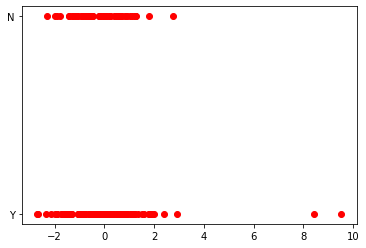

In [67]:
#visualizing  observed data
plt.scatter(x_test[:,0],y_test,c='r')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


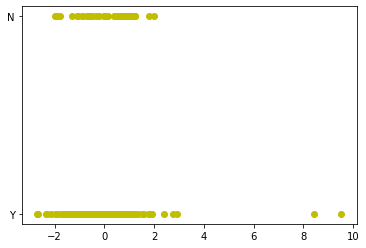

In [68]:
#visualizing predic data
plt.scatter(x_test[:,0],y_pred,c='Y')

In [69]:
#checking score
metrics.accuracy_score(y_test,y_pred)

0.7119565217391305

In [70]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [71]:
cm

array([[ 23,  33],
       [ 20, 108]])

In [72]:
#support vector machine
from sklearn.svm import SVC
svcrbf=SVC(random_state=0)
svclin=SVC(random_state=0)

In [73]:
#training model
svcrbf.fit(x_train,y_train)
svclin.fit(x_train,y_train)

SVC(random_state=0)

In [74]:
y_predr=svcrbf.predict(x_test)
y_predl=svclin.predict(x_test)

In [75]:
y_predl

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [76]:
#rbf svm
metrics.accuracy_score(y_test,y_predr)

0.75

In [77]:
#lin svm
metrics.accuracy_score(y_test,y_predl)

0.75

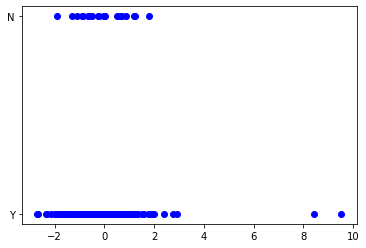

In [78]:
#visualizing predicted data
plt.scatter(x_test[:,0],y_predl,c='b')

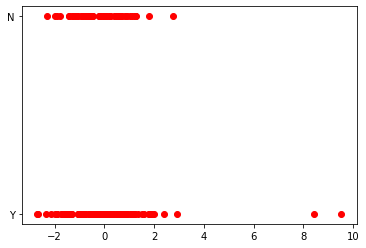

In [79]:
#obsvere data
plt.scatter(x_test[:,0],y_test,c='r')

In [80]:
#randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [81]:
model.score(x_test,y_test)

0.657608695652174

In [82]:
import pickle
file=open('model.pkl','wb')
pickle.dump(model,file)